In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import LFPy
import neuron
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

In [3]:
#A plottin' function
def plotcell(cell, color='k'):
    for sec in cell.template.all:
        idx = cell.get_idx(sec.name())
        plt.plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
                 np.r_[cell.zstart[idx], cell.zend[idx][-1]],
                 color=color)
    print(' ')

In [4]:
cellParameters = {
    'morphology' : 'morphologies/L5_Mainen96_LFPy.hoc',
    'tstart' : -50.,
    'tstop' : 200.,
    'dt' : 2**-4,
    'passive' : True,
}

In [5]:
cellParameters_2 = {
    'morphology' : 'morphologies/L5_Mainen96_LFPy.hoc',
    'tstart' : -50.,
    'tstop' : 200.,
    'dt' : 2**-4,
    'passive' : True,
}

In [6]:
#cells = []

#cells.append(LFPy.Cell(**cellParameters))
#cells[0].set_pos(x=-200., y=0., z=0.)    #Move the cell geometry so that midpoint of soma section
#cells[0].set_rotation(z=np.pi)          #Rotate geometry of cell object around the x-, y-, z-axis
#id = cells[0].get_idx("soma[0]")
#print(id)

In [7]:
#cells.append(LFPy.Cell(**cellParameters))
#cells[1].set_pos(x=200., y=0., z=0.)
#cells[1].set_rotation(z=np.pi)
#id = cells[1].get_idx("soma[0]")
#print(id)

In [8]:
#cell_a = LFPy.Cell(**cellParameters)
#cell_a.set_pos(x=-400., y=0., z=0.)
#cell_b = LFPy.Cell(**cellParameters)
#cell_b.set_pos(x=400., y=0., z=0.)
#cell_b.set_rotation(z=np.pi)

#figure(figsize=(12, 6))
#subplot(131)

#zips = []
#for x, z in cell_a.get_idx_polygons(projection=('x', 'z')):
#    zips.append(list(zip(x, z)))
    #print(type(zip(x, z)))
#for x, z in cell_b.get_idx_polygons(projection=('x', 'z')):
#    zips.append(list(zip(x, z)))
    
#polycol = PolyCollection(zips,edgecolors='none',facecolors='gray')

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.add_collection(polycol)
#ax.plot(cell.xmid[synapse.idx], cell.zmid[synapse.idx], 'ro')
#ax.axis(ax.axis('equal'))
#plt.show()
#print(cells[0].get_idx("apic[48]"))
#print(cells[1].get_idx("apic[35]"))
#print(cells[0].allsecnames)
#for c in cells:
#    for secname in c.allsecnames:
#        idx = c.get_idx(secname)
#        print(c, secname, idx)
#        plot(np.r_[c.xstart[idx], c.xend[idx][-1]],
#             np.r_[c.zstart[idx], c.zend[idx][-1]],
#             color='k')    

#for secname in cell_a.allsecnames:
#    print(secname, idx)
#    plot(np.r_[cell_a.xstart[idx], cell_a.xend[idx][-1]],
#         np.r_[cell_a.zstart[idx], cell_a.zend[idx][-1]],
#         color='k')

#for sec in LFPy.cell.neuron.h.allsec():
#    idx = cells[0].get_idx(sec.name())
#    print(sec, sec.name(), idx)
#    plot(np.r_[cells[0].xstart[idx], cells[0].xend[idx][-1]],
#         np.r_[cells[0].zstart[idx], cells[0].zend[idx][-1]],
#         color='k')

#for c in cells:
#    for sec in LFPy.cell.neuron.h.allsec():
#        idx = c.get_idx(sec.name())
#        print(sec.name(), sec, idx)
#        plot(np.r_[c.xstart[idx], c.xend[idx][-1]],
#             np.r_[c.zstart[idx], c.zend[idx][-1]],
#             color='k')

In [9]:
#delete cell instances from previous script executions,
neuron.h('forall delete_section()')

1

In [10]:
cellParameters1 = {
    'morphology' : 'morphologies/markram/CNG version/C010398B-P2.CNG.swc',
    'templatefile' : 'LFPyCellTemplate.hoc',
    'templatename' : 'LFPyCellTemplate',
    'templateargs' : None,
    'tstart' : -50.,
    'tstop' : 200.,
    'dt' : 2**-4,
    'passive' : True,
}

One point section Import3d_Section[2] ending at line 27 has been removed
One point section Import3d_Section[1] ending at line 26 has been removed
 
 
 


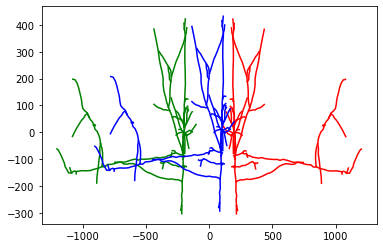

In [11]:
#create some cell instances, set the positions, plot the morphologies
cell1 = LFPy.TemplateCell(**cellParameters1)
cell1.set_pos(x=200., y=0., z=0.)
plotcell(cell=cell1, color='r')


cell2 = LFPy.TemplateCell(
    morphology='morphologies/markram/Source-Version/C010398B-P2.asc',
    templatefile='LFPyCellTemplate.hoc',
    templatename='LFPyCellTemplate',
    templateargs=None)
cell2.set_pos(x=-200., y=0., z=0.)
cell2.set_rotation(z=np.pi)
plotcell(cell=cell2, color='g')

cell3 = LFPy.TemplateCell(
    morphology='morphologies/markram/Source-Version/C010398B-P2.asc',
    templatefile='LFPyCellTemplate.hoc',
    templatename='LFPyCellTemplate',
    templateargs=None)
cell3.set_pos(x=100., y=20., z=10.)
cell3.set_rotation(z=np.pi)
plotcell(cell=cell3, color='b')
plt.show()

In [12]:
synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,     #rise time
    'tau2' : 2.0,     #decay time
    'weight' : 0.005,
    'record_current' : True,
}

In [13]:
synapse1 = LFPy.Synapse(cell1,
                       idx = cell1.get_closest_idx(x=200., y=0.,z=200.),
                       **synapseParameters)

#synapse1.set_spike_times(np.array([10.]))

In [14]:
X, Y, Z = np.mgrid[-700:701:50, -700:701:50, -400:1201:50]
#X, Z = np.mgrid[-700:701:50, -400:1201:50]
#Y = np.zeros(X.shape)
grid_electrode_parameters = {
    'sigma' : 0.3,      # extracellular conductivity
    'x' : X.flatten(),  # electrode requires 1d vector of positions
    'y' : Y.flatten(),
    'z' : Z.flatten(),
}

print(X.shape,Y.shape,Z.shape)
#for i,j,k in zip(X.flatten(),Y.flatten(),Z.flatten()):
#    print(i,j,k)
sio.savemat('mgrida.mat', {'x': X.flatten(),'y': Y.flatten(),'z': Z.flatten()}) 
n_grid_electrode=X.flatten().size
print(n_grid_electrode)
data=sio.loadmat('lfp.mat')
print(data['lfp'].shape)

(29, 29, 33) (29, 29, 33) (29, 29, 33)
27753
(1, 27753)


In [15]:
synapse_b = LFPy.Synapse(cell_b,
                       idx = cell_b.get_closest_idx(x=400., y=0.,z=800.),
                       **synapseParameters)

synapse_b.set_spike_times(np.array([10., 30., 50.]))

NameError: name 'cell_b' is not defined

In [ ]:
z = mgrid[-400:1201:100]
electrodeParameters = {
    'x' : zeros(z.size),
    'y' : zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}

In [ ]:
electrode = LFPy.RecExtElectrode(**electrodeParameters)

In [ ]:
#cell.simulate(electrode = electrode)
#cell.simulate()

In [ ]:
synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.005,
    'record_current' : True,
}

In [ ]:
z = mgrid[-400:1201:100]
electrodeParameters = {
    'x' : zeros(z.size),
    'y' : zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}